In [72]:
%matplotlib notebook
"""
This scripts compares the validation data with the ones obtained
  with edgelist_perco_t, namely
  - get_nb_components
  - get_size_largest_perco_component
  - get_size_second_largest_perco_component

Copyright (C) 2020  Antoine Allard (antoineallard.info)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans',
                                   'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.fontsize"] = "xx-small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 5
plt.rcParams["lines.markeredgewidth"] = 2

In [86]:
header = open("validation_raw_results.dat", 'r').readline().replace('#', ' ').split()
df = pd.read_csv("validation_raw_results.dat", comment='#', sep='[ \s]{2,}', engine='python', names=header)
df["frac_edges"] = df["nb_edges"] / df["nb_edges"].max()
df

,nb_edges,size_1st,size_2nd,nb_comp,frac_edges
0,635,248,1,3,1.000000
1,634,248,1,3,0.998425
2,633,248,1,3,0.996850
3,632,248,1,3,0.995276
4,631,248,1,3,0.993701
...,...,...,...,...,...
15895,4,2,2,246,0.006299
15896,3,2,2,247,0.004724
15897,2,2,2,248,0.003150
15898,1,2,1,249,0.001575


In [87]:
def perc95(series):
    return np.percentile(series, 95)

def perc05(series):
    return np.percentile(series,  5)

pt = pd.pivot_table(df, aggfunc=[np.mean, np.median, perc05, perc95],
                    values=['nb_comp', 'size_2nd','size_1st'], index=['frac_edges'])
pt

mean                    median                    perc05  \
           nb_comp size_1st size_2nd nb_comp size_1st size_2nd nb_comp   
frac_edges                                                               
0.000000    250.00     1.00     1.00     250        1        1   250.0   
0.001575    249.00     2.00     1.00     249        2        1   249.0   
0.003150    248.00     2.04     1.96     248        2        2   248.0   
0.004724    247.00     2.04     2.00     247        2        2   247.0   
0.006299    246.00     2.16     2.00     246        2        2   246.0   
...            ...      ...      ...     ...      ...      ...     ...   
0.993701      3.12   247.88     1.00       3      248        1     3.0   
0.995276      3.12   247.88     1.00       3      248        1     3.0   
0.996850      3.04   247.96     1.00       3      248        1     3.0   
0.998425      3.04   247.96     1.00       3      248        1     3.0   
1.000000      3.00   248.00     1.00       3      248        1     3.0   

                              perc95                    
           size_1st size_2nd nb_comp size_1st size_2nd  
frac_edges                                              
0.000000        1.0      1.0   250.0      1.0      1.0  
0.001575        2.0      1.0   249.0      2.0      1.0  
0.003150        2.0      2.0   248.0      2.0      2.0  
0.004724        2.0      2.0   247.0      2.0      2.0  
0.006299        2.0      2.0   246.0      3.0      2.0  
...             ...      ...     ...      ...      ...  
0.993701      247.0      1.0     4.0    248.0      1.0  
0.995276      247.0      1.0     4.0    248.0      1.0  
0.996850      248.0      1.0     3.0    248.0      1.0  
0.998425      248.0      1.0     3.0    248.0      1.0  
1.000000      248.0      1.0     3.0    248.0      1.0  

[636 rows x 12 columns]

<IPython.core.display.Javascript object>


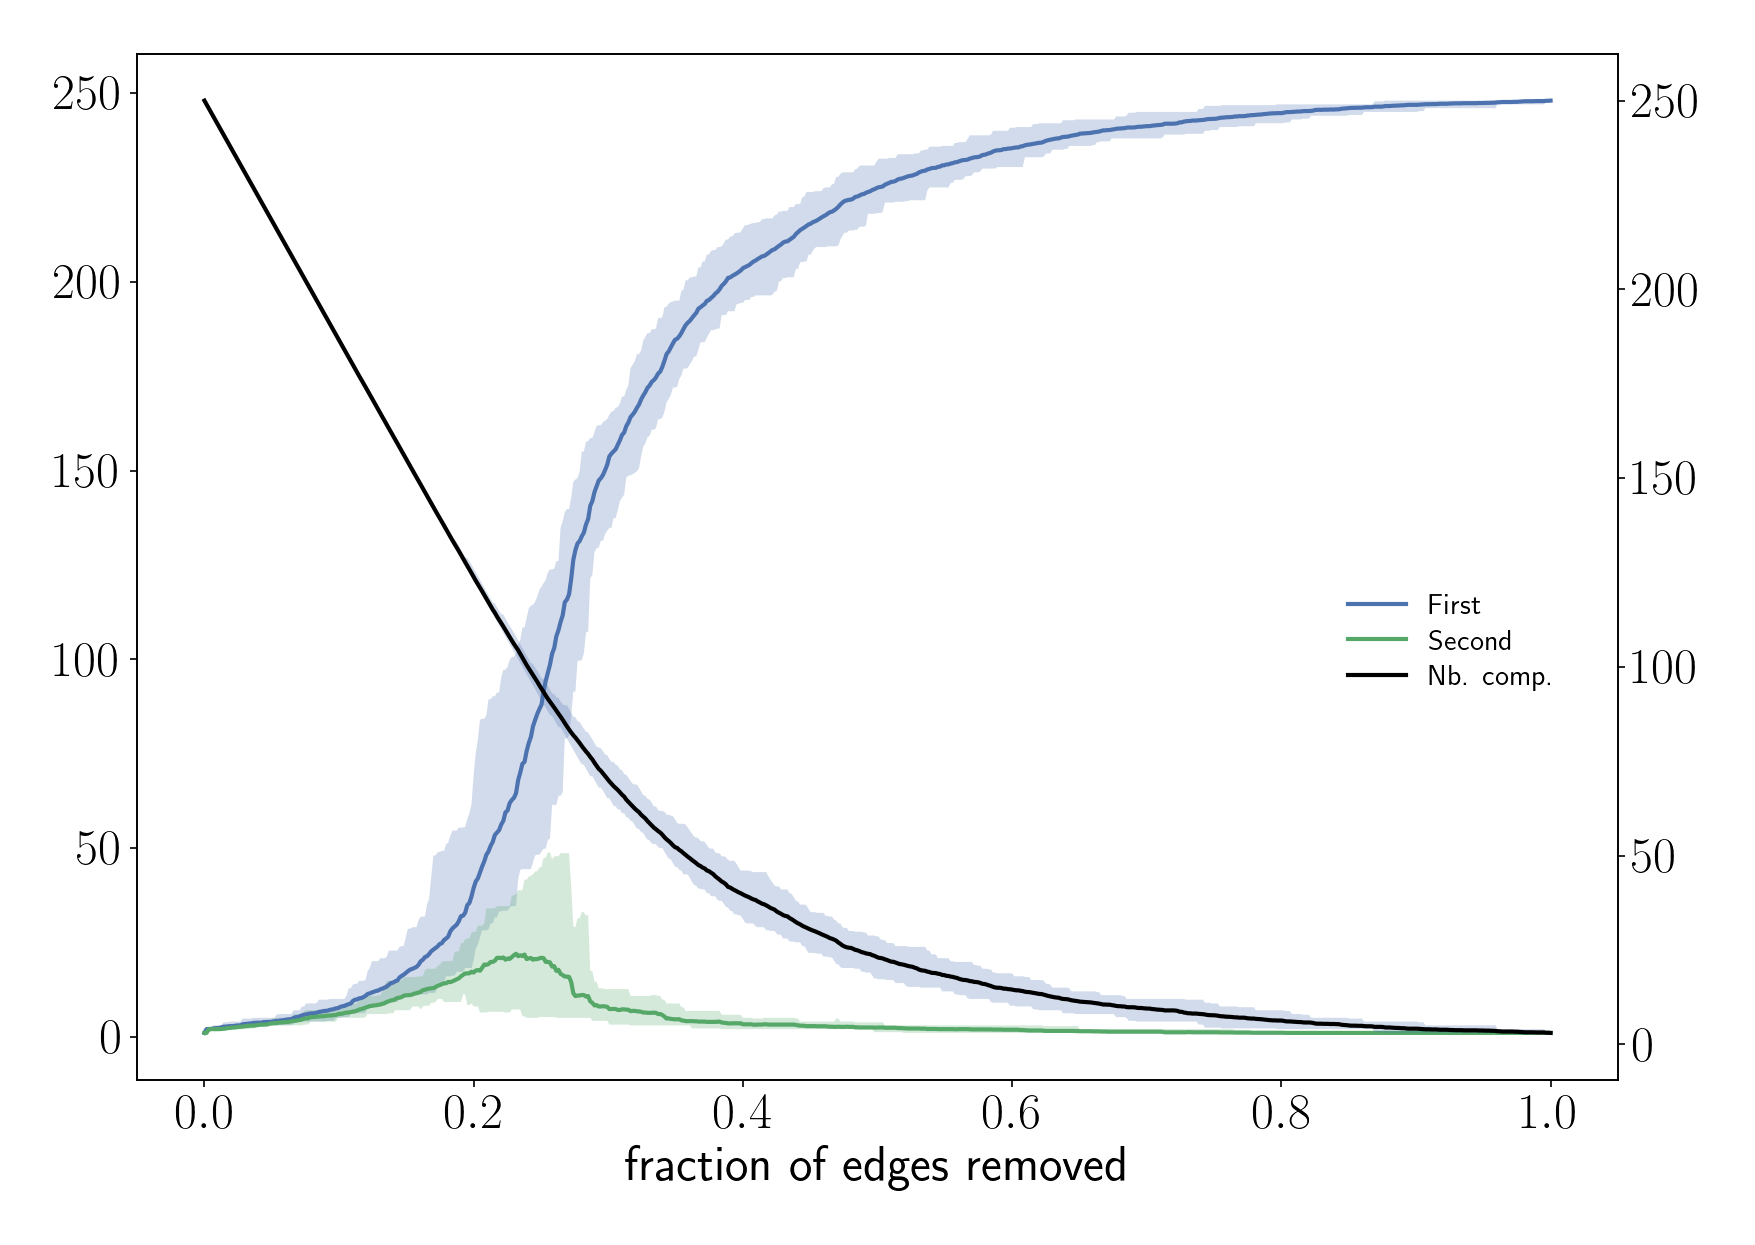

In [150]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.fill_between(x=np.array(pt.index),
                 y1=np.array(pt["perc05"]["size_1st"]),
                 y2=np.array(pt["perc95"]["size_1st"]),
                 linewidth=0, alpha=0.25, label="")
lns1 = ax1.plot(np.array(pt.index),np.array(pt["mean"]["size_1st"]),
                 linestyle="-", linewidth=2, marker="None", label=r"First")


ax1.fill_between(x=np.array(pt.index),
                 y1=np.array(pt["perc05"]["size_2nd"]),
                 y2=np.array(pt["perc95"]["size_2nd"]),
                 linewidth=0, alpha=0.25, label="")
lns2 = ax1.plot(np.array(pt.index),np.array(pt["mean"]["size_2nd"]),
                 linestyle="-", linewidth=2, marker="None", label="Second")


ax2.fill_between(x=np.array(pt.index),
                 y1=np.array(pt["perc05"]["nb_comp"]),
                 y2=np.array(pt["perc95"]["nb_comp"]),
                 linewidth=0, alpha=0.25, label="")
lns3 = ax2.plot(np.array(pt.index),np.array(pt["mean"]["nb_comp"]),
                 linestyle="-", linewidth=2, color="k", marker="None", label=r"Nb. comp.")


lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc="upper left", bbox_to_anchor=(0.8, 0.5), labelspacing=0.3)


ax1.set(xlabel=r"fraction of edges removed")

plt.tight_layout()
# fig.savefig("figures/pdf/" + synth_graph_name + "_number_of_triangles.pdf")